[  0.00000000e+000   2.55682812e-313   2.48273508e-312 ...,
   0.00000000e+000   0.00000000e+000   0.00000000e+000] [  1.00000000e+000   2.55682812e-313   0.00000000e+000 ...,
   0.00000000e+000   0.00000000e+000   0.00000000e+000] [  1.05000000e+000   2.55682812e-313   0.00000000e+000 ...,
   0.00000000e+000   0.00000000e+000   0.00000000e+000]
[ 0.          0.01        0.01989    ..., -9.13714936 -9.20226051
 -9.26764201] [  1.           0.999        0.99827053 ..., -15.64826433 -15.7404106
 -15.83231478] [  1.05         1.04719965   1.04441676 ...,  16.20260709  16.30237527
  16.40374419]


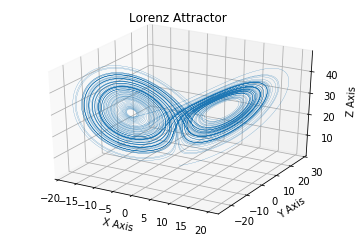

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.001
num_steps = 100000

# Need one more for the initial values
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))
# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)
print(xs, ys, zs)
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

print(xs, ys, zs)
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [14]:
print(xs, ys, zs)
mat_xs = np.array([xs])
mat_ys = np.array([ys])
mat_zs = np.array([zs])
print(mat_xs.T)
mat_Lor = np.concatenate((mat_xs.T, mat_ys.T, mat_zs.T), axis=1)
print(mat_Lor.shape)

[ 0.          0.01        0.01989    ..., -9.13714936 -9.20226051
 -9.26764201] [  1.           0.999        0.99827053 ..., -15.64826433 -15.7404106
 -15.83231478] [  1.05         1.04719965   1.04441676 ...,  16.20260709  16.30237527
  16.40374419]
[[ 0.        ]
 [ 0.01      ]
 [ 0.01989   ]
 ..., 
 [-9.13714936]
 [-9.20226051]
 [-9.26764201]]
(100001, 3)


In [15]:
def get_boxes_2(dim, step, vector_map):
    i = step
    vect_boxes_int = np.array([range(dim)])
    boxes_sum = list()
    first_box = 1
    dict_boxes = {}
    for ind in range(vector_map.shape[0]):
        vec_space = vector_map[ind:ind+1,:]
        vec_space = vec_space[:,0:dim]
        vec_space_int = vec_space // i
        vec_space_float = vec_space / i
        vec_space_list = list()
        for k in range(vec_space_int.shape[1]):
            vec_space_list.append(vec_space_int[0,k])
        key_tuple = tuple(x for x in vec_space_list)
        if (first_box):
            vect_boxes_int[0:1,:] = vec_space_int
            first_box = 0
            dict_boxes[key_tuple] = 1
        else:
            if (dict_boxes.get(key_tuple) != None):
                dict_boxes[key_tuple] += 1;
            else:
                vect_boxes_int = np.concatenate((vect_boxes_int, vec_space_int), axis=0)
                dict_boxes[key_tuple] = 1
    for j in range(vect_boxes_int.shape[0]):
        vec_space_list = list()
        for k in range(vect_boxes_int.shape[1]):
            vec_space_list.append(vect_boxes_int[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        boxes_sum.append(dict_boxes[key_tuple])
    mat_ans = np.array([boxes_sum])
    return mat_ans, vect_boxes_int, dict_boxes

In [16]:
def cut_box(ve_bo_30, mat_mes_30):
    ve_bo_30_div2 = np.array([])
    box_count_30_div2 = list()
    first_box_30_2 = 1
    dict_boxes_30_div2 = {}
    for j in range(ve_bo_30.shape[0]):
        temp_mat_8lines = np.array([])
        first_box_temp = 1
        for a in range(0, 2):
            for b in range(0, 2):
                for c in range(0, 2):
                    num_1 = ve_bo_30[j, 0]
                    num_2 = ve_bo_30[j, 1]
                    num_3 = ve_bo_30[j, 2]
                    if (first_box_temp):
                        temp_mat_8lines = np.array([[num_1 * 2 + a, num_2 * 2 + b, num_3 * 2 + c]])
                        first_box_temp = 0
                    else:
                        temp_mat_8lines = np.concatenate((temp_mat_8lines, np.array([[num_1 * 2 + a, num_2 * 2 + b, num_3 * 2 + c]])), axis=0)
        if (first_box_30_2):
            first_box_30_2 = 0;
            ve_bo_30_div2 = temp_mat_8lines
        else:
            ve_bo_30_div2 = np.concatenate((ve_bo_30_div2, temp_mat_8lines), axis=0)
        for k in range(2 ** 3):
            box_count_30_div2.append(mat_mes_30[0, j] / (2 ** 3))
    for j in range(ve_bo_30_div2.shape[0]):
        vec_space_list = list()
        for k in range(ve_bo_30_div2.shape[1]):
            vec_space_list.append(ve_bo_30_div2[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        dict_boxes_30_div2[key_tuple] = box_count_30_div2[j]
    return ve_bo_30_div2, dict_boxes_30_div2

In [17]:
def get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2):
    pair_p_q = list(tuple())
    for j in range(ve_bo_15.shape[0]):
        vec_space_list = list()
        for k in range(ve_bo_15.shape[1]):
            vec_space_list.append(ve_bo_15[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        pair_p_q.append((dict_boxes_15[key_tuple], dict_boxes_30_div2[key_tuple]))
    return pair_p_q

In [18]:
def sum_div(pair_p_q):
    sum = 0
    for k in range(len(pair_p_q)):
        sum += pair_p_q[k][0] * math.log(pair_p_q[k][0] / pair_p_q[k][1])
    return sum

In [19]:
min_ = 10000000
x_res = np.empty((14,))
y_res = np.empty((14,))
for i in range(-10, 4):
    eps = 1 / 2 ** i
    mat_mes_15, ve_bo_15, dict_boxes_15 = get_boxes_2(3, eps / 2, mat_Lor)
    mat_mes_30, ve_bo_30, dict_boxes_30 = get_boxes_2(3, eps, mat_Lor)
    ve_bo_30_div2, dict_boxes_30_div2 = cut_box(ve_bo_30, mat_mes_30)
    pair_p_q = get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2)
    x_res[i + 10] = math.log(eps, 2)
    y_res[i + 10] = sum_div(pair_p_q) / 100001
    print(sum_div(pair_p_q) / 100001, "     eps =", eps, ",       check eps / 2 =", eps / 2, mat_mes_30.shape, mat_mes_15.shape)

2.0794415416798353      eps = 1024.0 ,       check eps / 2 = 512.0 (1, 4) (1, 4)
2.0794415416798353      eps = 512.0 ,       check eps / 2 = 256.0 (1, 4) (1, 4)
2.0794415416798353      eps = 256.0 ,       check eps / 2 = 128.0 (1, 4) (1, 4)
2.0794415416798353      eps = 128.0 ,       check eps / 2 = 64.0 (1, 4) (1, 4)
1.588618003573682      eps = 64.0 ,       check eps / 2 = 32.0 (1, 4) (1, 8)
1.3381282033261162      eps = 32.0 ,       check eps / 2 = 16.0 (1, 8) (1, 24)
0.8688198777500912      eps = 16.0 ,       check eps / 2 = 8.0 (1, 24) (1, 79)
0.7408532494284823      eps = 8.0 ,       check eps / 2 = 4.0 (1, 79) (1, 269)
0.7132309621390783      eps = 4.0 ,       check eps / 2 = 2.0 (1, 269) (1, 953)
0.7294214029862164      eps = 2.0 ,       check eps / 2 = 1.0 (1, 953) (1, 3220)
0.8253398383467588      eps = 1.0 ,       check eps / 2 = 0.5 (1, 3220) (1, 10265)
0.999254723191566      eps = 0.5 ,       check eps / 2 = 0.25 (1, 10265) (1, 27243)
1.2604573003024184      eps = 0.25 ,  

[ 10.   9.   8.   7.   6.   5.   4.   3.   2.   1.   0.  -1.  -2.  -3.] [ 2.07944154  2.07944154  2.07944154  2.07944154  1.588618    1.3381282
  0.86881988  0.74085325  0.71323096  0.7294214   0.82533984  0.99925472
  1.2604573   1.54860517]


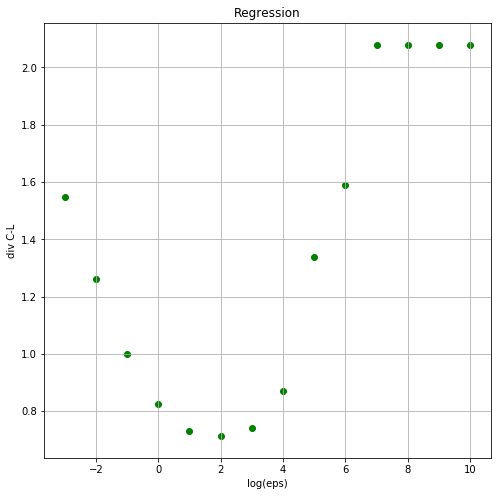

In [20]:
print(x_res, y_res)
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.title('Regression')
plt.ylabel('div C-L')
plt.xlabel('log(eps)')
plt.legend()
plt.scatter(x_res, y_res, color='green', label='poly_of_20_degree')
plt.show()

In [22]:
eps = 2 ** 2
mat_mes_15, ve_bo_15, dict_boxes_15 = get_boxes_2(3, eps / 2, mat_Lor)
mat_mes_30, ve_bo_30, dict_boxes_30 = get_boxes_2(3, eps, mat_Lor)
ve_bo_30_div2, dict_boxes_30_div2 = cut_box(ve_bo_30, mat_mes_30)
pair_p_q = get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2)
print(mat_mes_30)    

[[ 161   61    6   31   12   36    4   15   47   16   28    4    8   12
    15    1   11   18   10    7   28   10   32    9   14   34    8   11
     2    4   22   16    4   23   26   24    3   33    2   58    9  642
  1746 1665 1296   99 2172  377 1594 1067  367  934  361 1060  431 1000
  1426 1048  131  990 1398  527  794  467   32    3  810   36  836  318
   836 2512 2876 1179  208  144  611  655  701  484  298 1184  525 1198
   454  555  512  165  374  385  624  811  646  600 1418  700  300   34
  2058  884  303  208  116  156   16  192   20   52  195  211   23  173
    29   61  152   96   14   26  176   19   52  305   42  101   43  227
    32  301  368 2390  314   66 2534 2868 1237  766  110  530 1257  455
   251  517  580  156  674  398   14  391  753  208  272   27  689   58
   798  756  604 1553  974  841  130  578  203  218   25   52  216  249
   189   19   70   81  164   89  127   39  250  332  192   36  364   29
   110    5  286   90  329  439 1233  862 1284  219  911  908  6